In [1]:
% Initialize MATLAB
clearvars
cd ../matlab 
pwd
format compact

ans = '/Users/eechris/code/src/github.com/cpjobling/eg-150-textbook/laplace_transform/matlab'

In [2]:
b = [1, 2, 3];    % s^2 + 2s + 3
a = [1, 4, 5, 6]; % s^3 + 4s^2 + 5s + 6

In [3]:
q = [1, 2, 0];
r = [1, 0, 2, 0, 1];

In [4]:
syms s

In [5]:
G(s) = (s^2 + 2*s + 3)/(s^3 + 4*s^2 + 5*s + 6)

In [6]:
[Num,Den] = numden(G(s))

In [7]:
nNum = sym2poly(Num), nDen = sym2poly(Den)

nNum = 1×3 double
     1     2     3

nDen = 1×4 double
     1     4     5     6

In [8]:
poly2sym(nNum,s)

In [9]:
z = [-1; -3];
p = [0; -2; -4];

In [10]:
K = 1;

In [11]:
G = zpk(z,p,K)

G

 =


   (s+1) (s+3)


  -------------


  s (s+2) (s+4)


Continuous-time zero/pole/gain model.

In [12]:
[num,den]=tfdata(G,'v')

num = 1×4 double
     0     1     4     3

den = 1×4 double
     1     6     8     0

In [13]:
G2=tf(num,den)

G2

 =


    s^2 + 4 s + 3


  -----------------


  s^3 + 6 s^2 + 8 s


Continuous-time transfer function.

In [14]:
G
G2 = tf(G)

G

 =


   (s+1) (s+3)


  -------------


  s (s+2) (s+4)


Continuous-time zero/pole/gain model.

G2

 =


    s^2 + 4 s + 3


  -----------------


  s^3 + 6 s^2 + 8 s


Continuous-time transfer function.

In [15]:
[zeros,poles,gain]=zpkdata(G2,'v')

zeros = 2×1 double
    -3
    -1

poles = 3×1 double
     0
    -4
    -2

gain = 1

In [16]:
G2=tf(num,den)

G2

 =


    s^2 + 4 s + 3


  -----------------


  s^3 + 6 s^2 + 8 s


Continuous-time transfer function.

In [17]:
[zeros,poles,gain]=zpkdata(G2,'v')

zeros = 2×1 double
    -3
    -1

poles = 3×1 double
     0
    -4
    -2

gain = 1

In [18]:
set(G,'InputName','Voltage','OutputName','Angular Position')

In [19]:
G3=zpk(z,p,K,'InputName','Armature Voltage (V)',...
    'OutputName','Load Shaft Position (rad)',...
    'notes','An armature voltage controlled servomechanism')

G3

 =


  From input "Armature Voltage (V)" to output "Load Shaft Position (rad)":


   (s+1) (s+3)


  -------------


  s (s+2) (s+4)


Continuous-time zero/pole/gain model.

In [20]:
get(G3,'notes')

ans = 1x1 cell array
    {'An armature voltage controlled servomechanism'}

In [21]:
in=G3.InputName, out=G3.OutputName

in = 1x1 cell array
    {'Armature Voltage (V)'}

out = 1x1 cell array
    {'Load Shaft Position (rad)'}

In [22]:
get(G3)

                Z: {[2x1 double]}
                P: {[3x1 double]}
                K: 1
    DisplayFormat: 'roots'
         Variable: 's'
          IODelay: 0
       InputDelay: 0
      OutputDelay: 0
        InputName: {'Armature Voltage (V)'}
        InputUnit: {''}
       InputGroup: [1x1 struct]
       OutputName: {'Load Shaft Position (rad)'}
       OutputUnit: {''}
      OutputGroup: [1x1 struct]
            Notes: {'An armature voltage controlled servomechanism'}
         UserData: []
             Name: ''
               Ts: 0
         TimeUnit: 'seconds'
     SamplingGrid: [1x1 struct]


In [23]:
G4 = zpk(G2)

G4

 =


   (s+3) (s+1)


  -------------


  s (s+4) (s+2)


Continuous-time zero/pole/gain model.

In [24]:
G5 = tf(G)

G5

 =


  From input "Voltage" to output "Angular Position":


    s^2 + 4 s + 3


  -----------------


  s^3 + 6 s^2 + 8 s


Continuous-time transfer function.

In [25]:
G1=tf([1 1],[1 3])
G2=tf(10,conv([1 0],[1 2])) % conv is polynomial multiplication
Gs=G1*G2 % series connection of two LTI objects

G1

 =


  s + 1


  -----


  s + 3


Continuous-time transfer function.

G2

 =


     10


  ---------


  s^2 + 2 s


Continuous-time transfer function.

Gs

 =


      10 s + 10


  -----------------


  s^3 + 5 s^2 + 6 s


Continuous-time transfer function.

In [26]:
[zeros,poles,K]=zpkdata(Gs,'v')

zeros = -1

poles = 3×1 double
         0
   -3.0000
   -2.0000

K = 10

In [27]:
Gp = G1 + G2

Gp

 =


  s^3 + 3 s^2 + 12 s + 30


  -----------------------


     s^3 + 5 s^2 + 6 s


Continuous-time transfer function.

In [28]:
G = tf([2 5 1],[1 2 3],'inputname','torque',...
    'outputname','velocity');
H = zpk(-2,-10,5);

In [29]:
Gc = feedback(G,H) % negative feedback assumed

Gc

 =


  From input "torque" to output "velocity":


  0.18182 (s+0.2192) (s+2.281) (s+10)


  -----------------------------------


   (s+3.419) (s^2 + 1.763s + 1.064)


Continuous-time zero/pole/gain model.

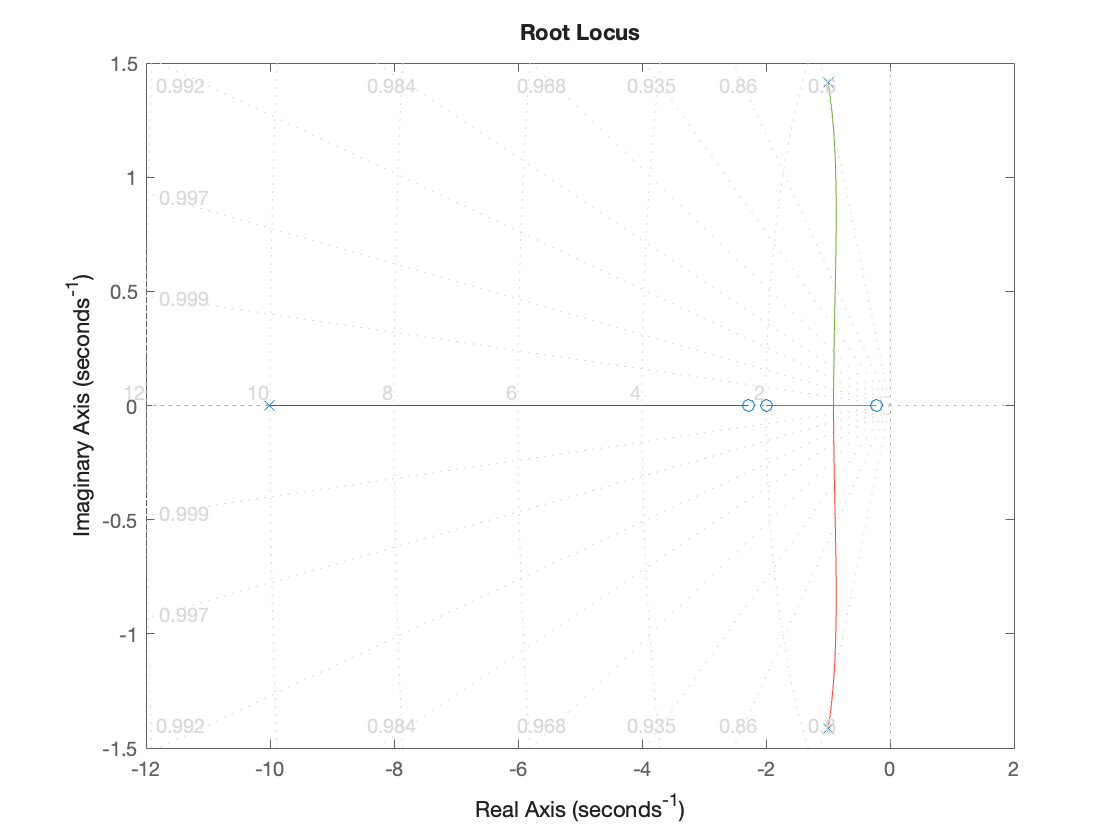

In [30]:
rlocus(G*H),sgrid

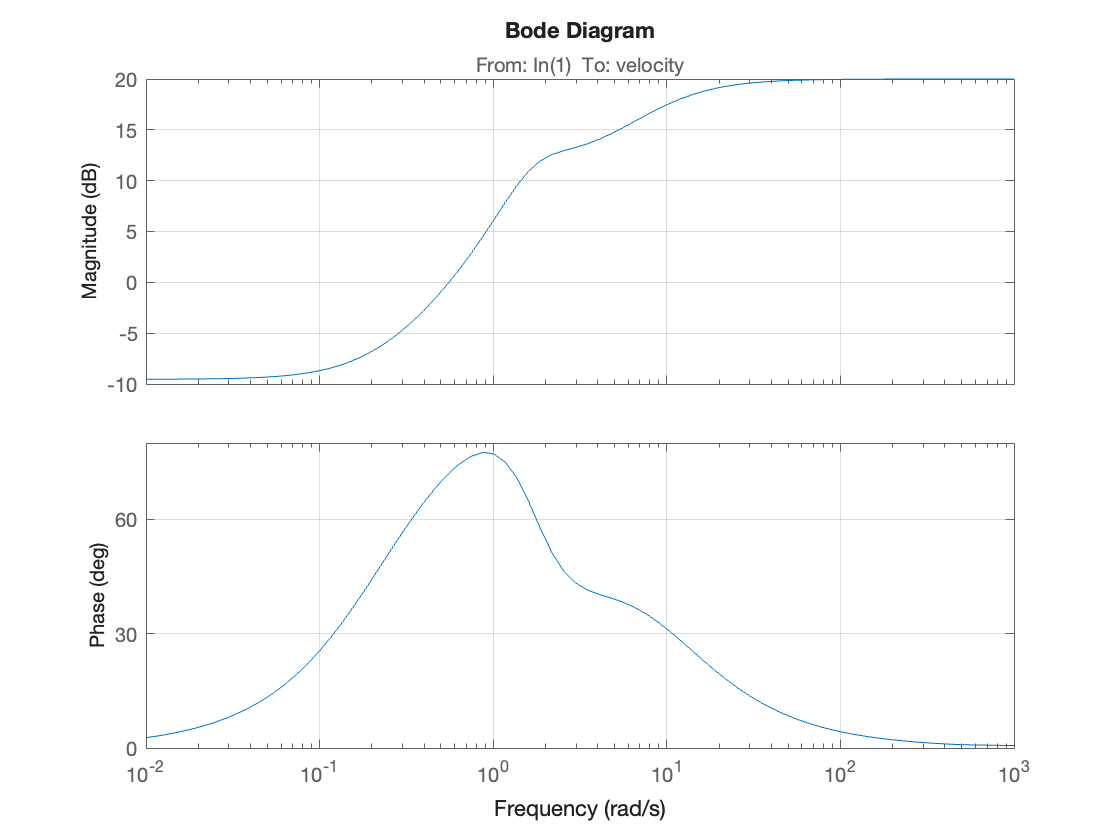

In [31]:
bode(G*H),grid

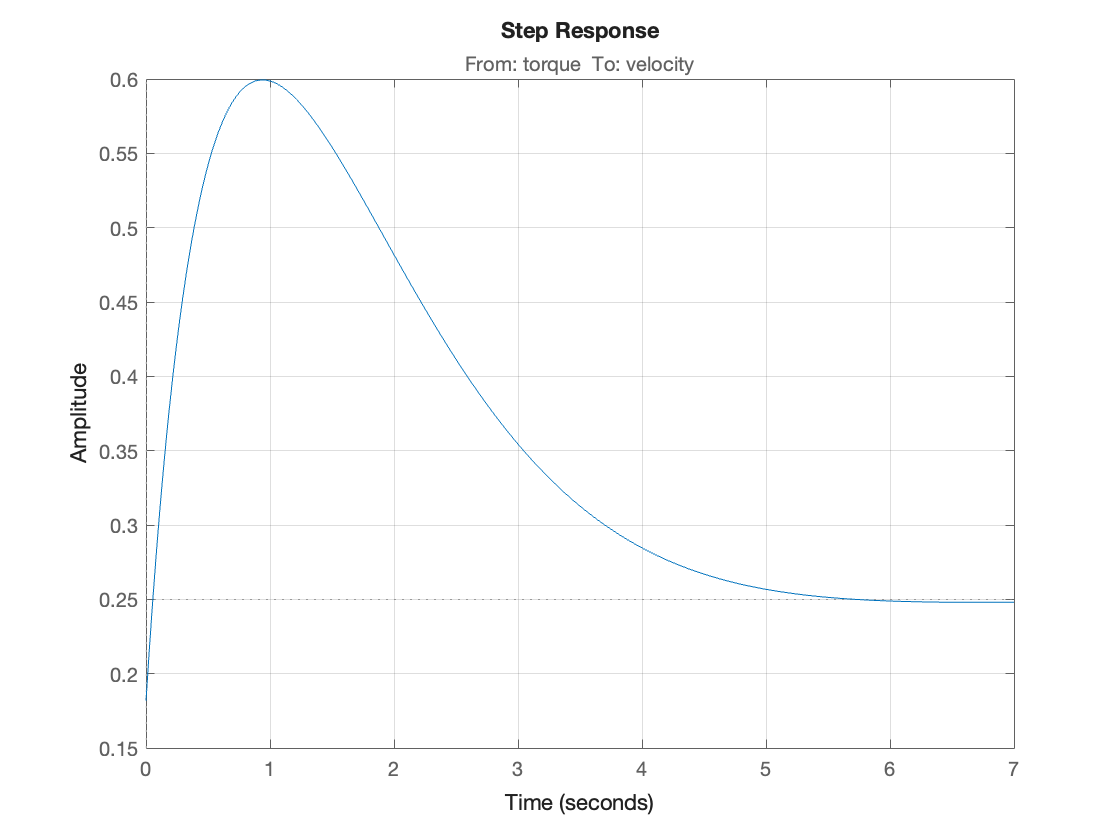

In [32]:
step(Gc),grid

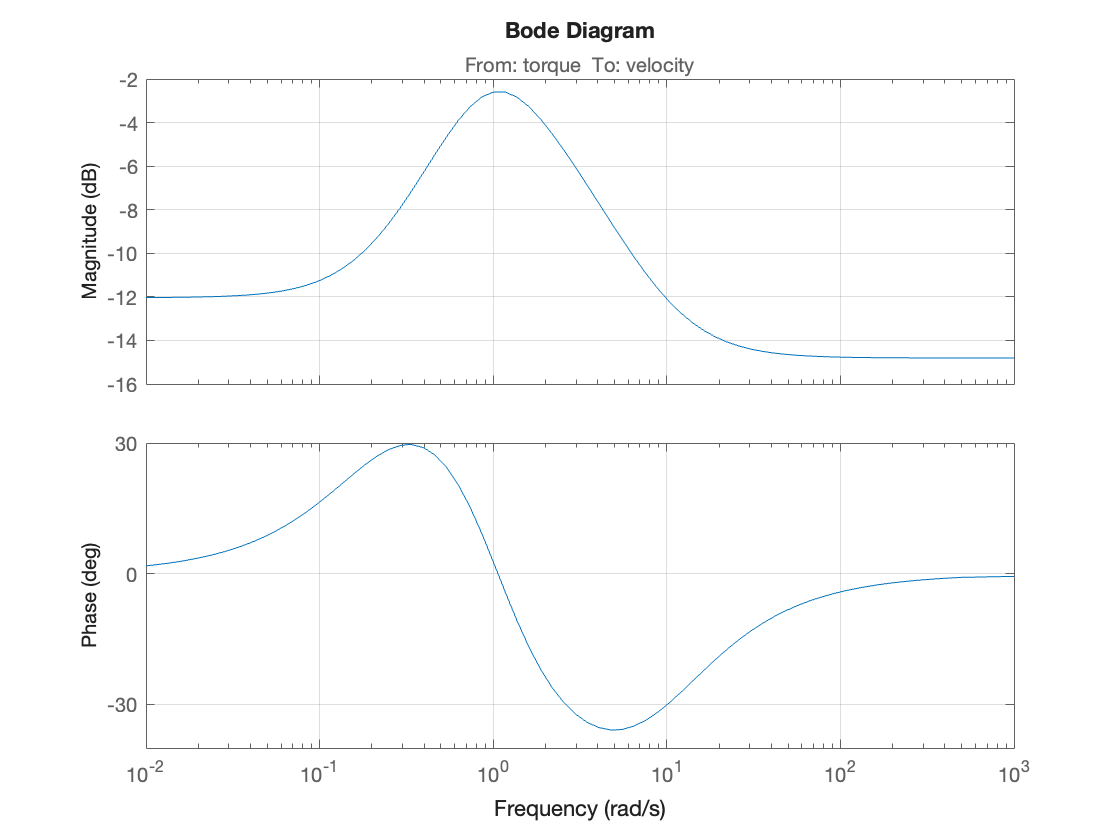

In [33]:
bode(Gc),grid

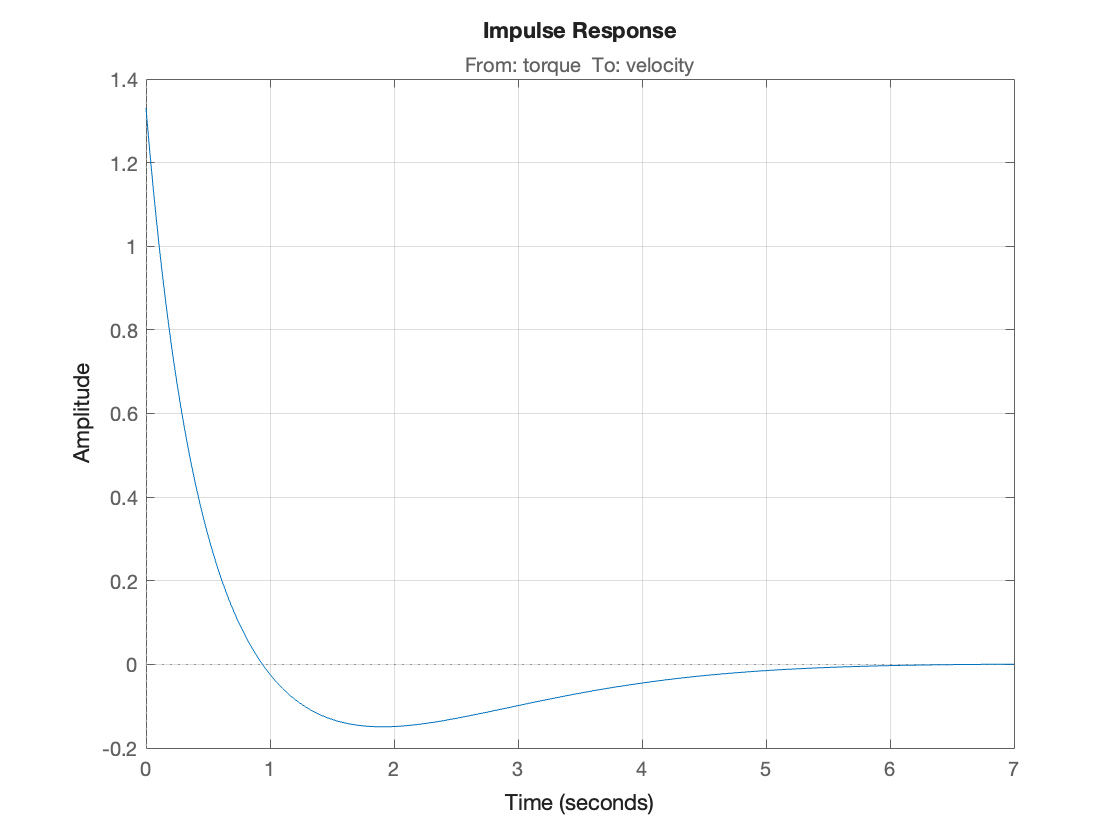

In [34]:
impulse(Gc),grid

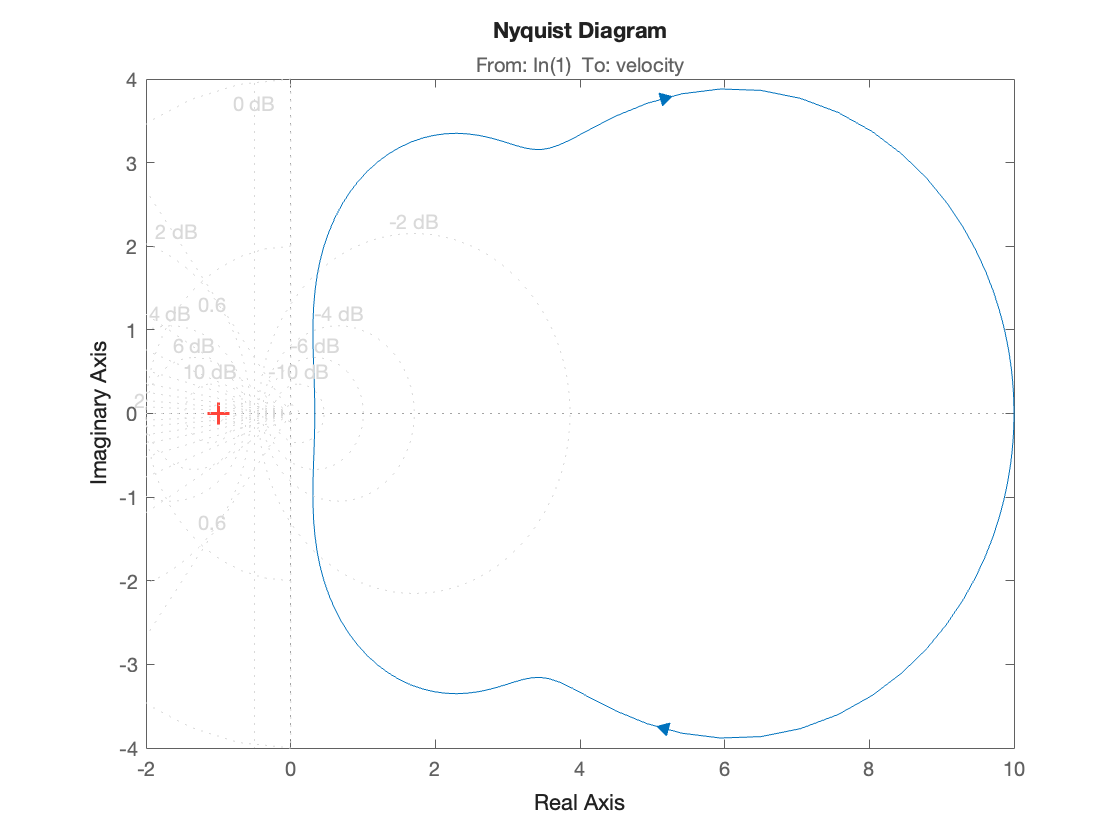

In [35]:
nyquist(G*H),grid

In [36]:
k = 5; z = [-2]; p = [0; -3; -10]; % zero-pole-gain form
C = zpk(z,p,k);
[num,den] = tfdata(C,'v')
%
% (Note that the leading terms in num are zero).

num = 1×4 double
     0     0     5    10

den = 1×4 double
     1    13    30     0

In [37]:
[r,p,k] = residue(num,den)

r = 3×1 double
   -0.5714
    0.2381
    0.3333

p = 3×1 double
   -10
    -3
     0

k =
     []


newC

 =


     5 s + 10


  ---------------


  s^2 + 13 s + 30


Continuous-time transfer function.

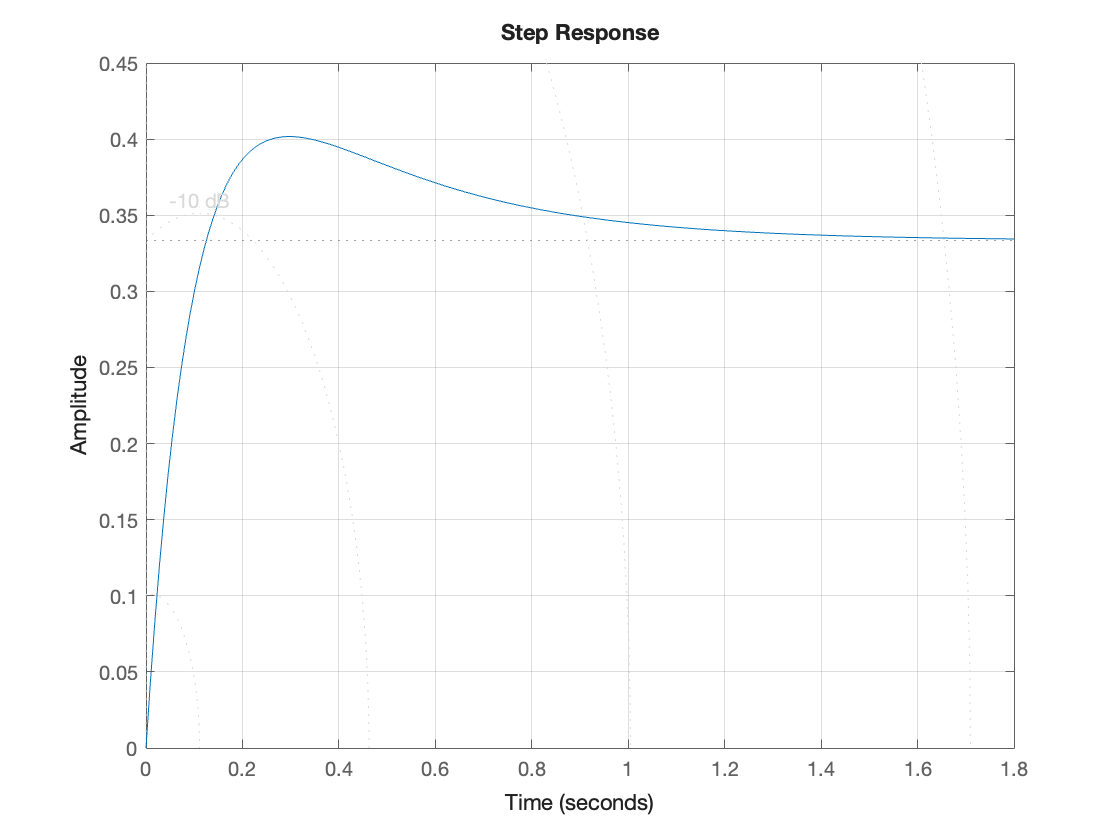

In [38]:
newC = tf([5, 10],[1, 13, 30])
step(newC),grid % provides $u_0(t)$

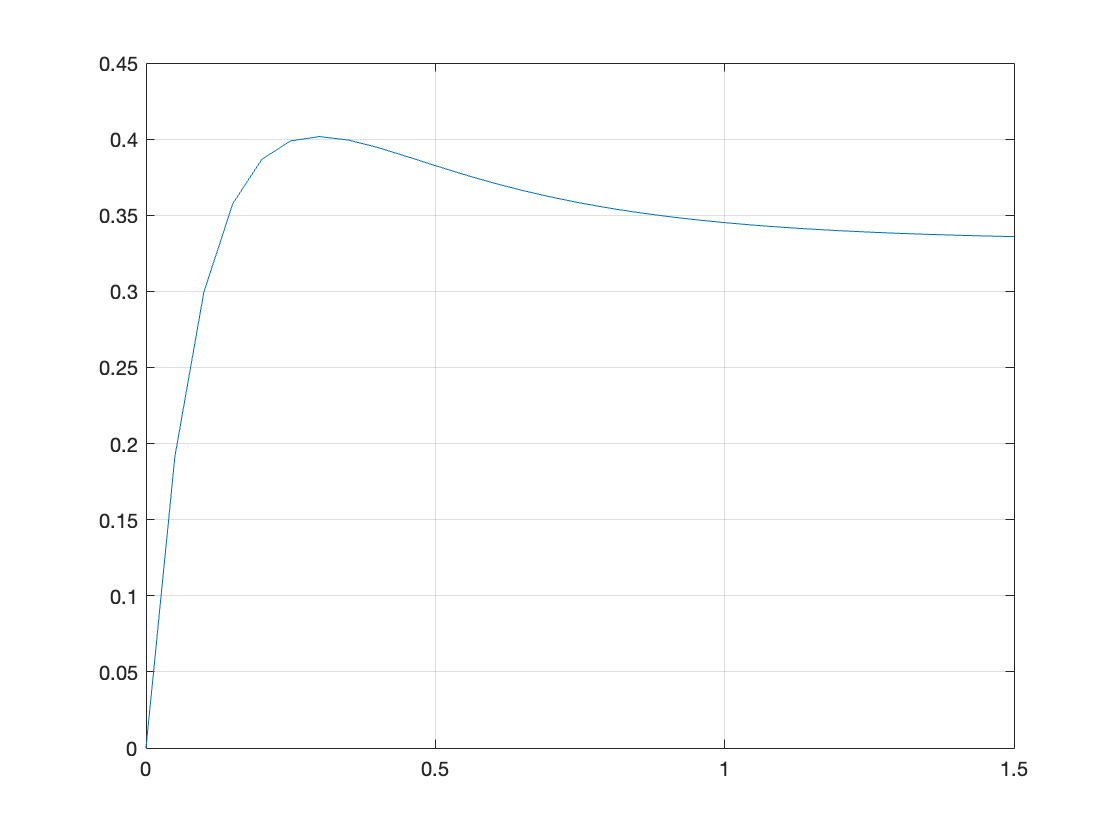

In [39]:
t = 0:.05:1.5; % time vector
c = 0.3333 + 0.2381 * exp(-3*t) - 0.5714 * exp(-10*t);
plot(t,c),grid

In [40]:
Hs = 5*(s+2)/((s + 3)*(s+10))

In [41]:
syms t
u_0(t) = heaviside(t);
Xs = laplace(u_0(t))

In [42]:
Ys = Hs*Xs

In [43]:
Ys = partfrac(Ys)

In [44]:
yt = ilaplace(Ys)

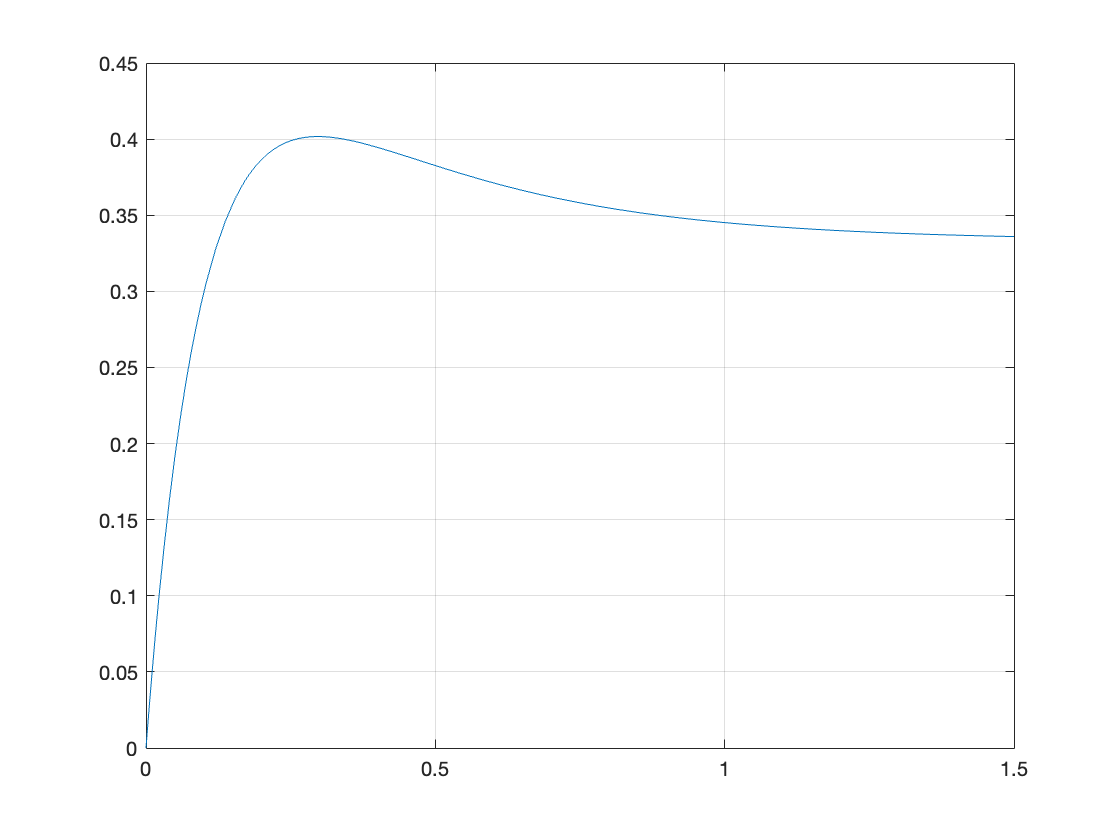

In [45]:
fplot(yt*u_0(t),[0,1.5]),ylim([0,0.45]),grid

In [46]:
ilaplace(Hs*laplace(u_0(t)))

In [47]:
G = tf([-1],[1 3 1])

G

 =


       -1


  -------------


  s^2 + 3 s + 1


Continuous-time transfer function.

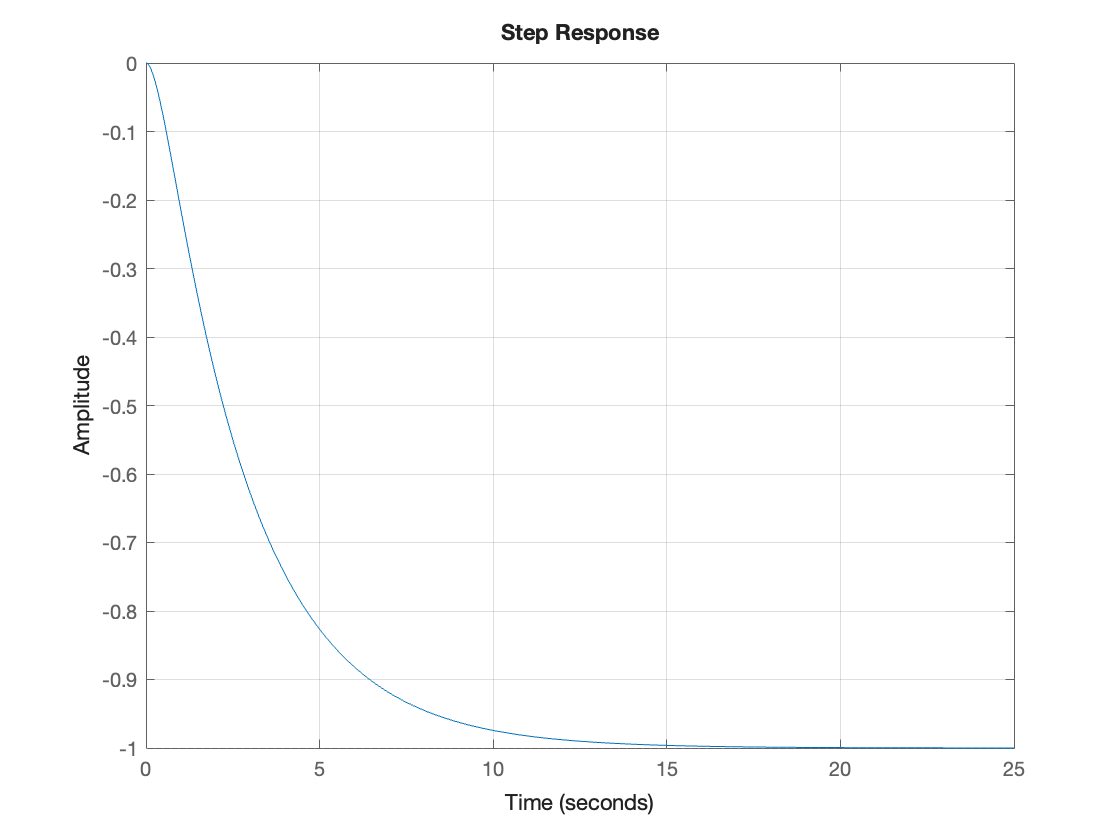

In [48]:
step(G),grid

In [49]:
cd('/Users/eechris/code/src/github.com/cpjobling/eg-150-textbook/laplace_transform/matlab')
open example_15_1

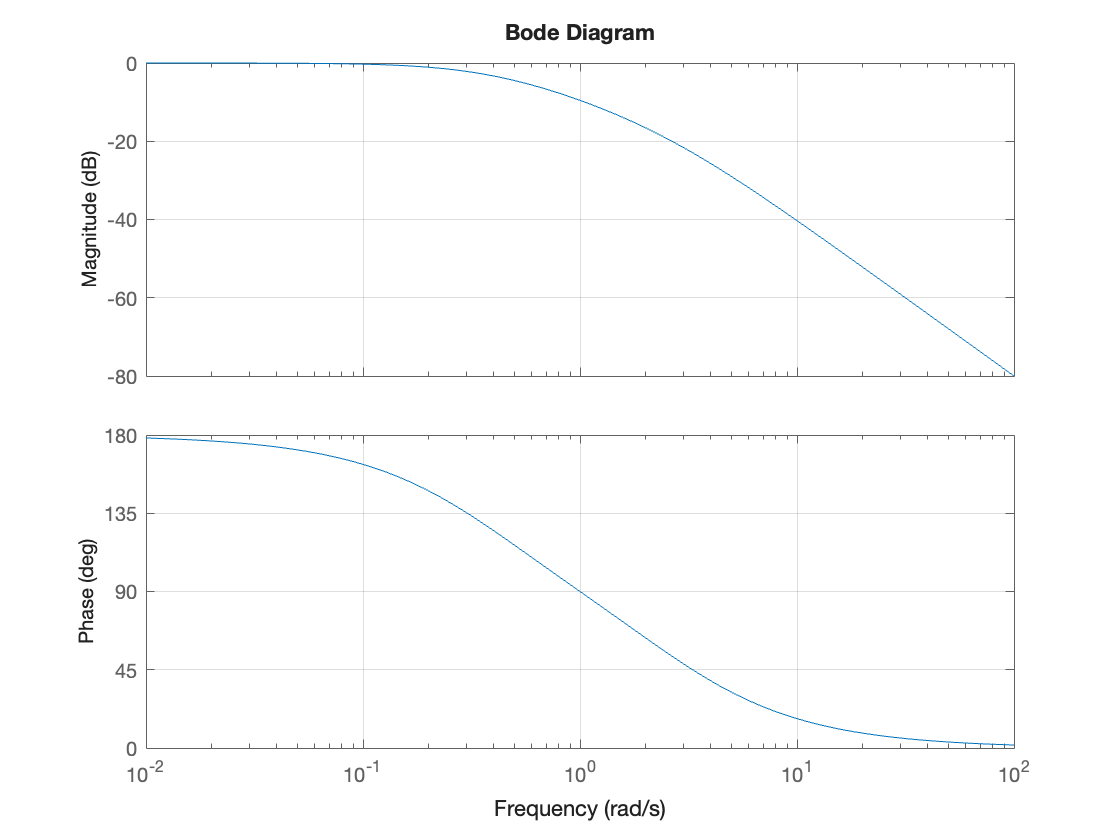

In [50]:
bode(G),grid